In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'car_price_prediction.csv'
df = pd.read_csv(filename)
df.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [3]:
df['Levy'] = df['Levy'].replace('-', 0).astype(float)

In [4]:
df.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [64]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [65]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [63]:
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [5]:
df.Category.unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [6]:
df['Mileage'] = df['Mileage'].str.replace(' km', '', regex=False).astype(int)

In [7]:
df.Model.unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], shape=(1590,), dtype=object)

In [8]:
# price vs levy
fig = px.scatter(
    df,
    x='Levy',
    y='Price',
    color='Manufacturer',
    title='Levy vs Price'
)
fig.show()

In [9]:
fig = px.scatter(
    df,
    x='Mileage',
    y='Price',
    color='Fuel type',
    title='Levy vs Price'
)
fig.show()

In [10]:
import numpy as np

df['Turbo'] = df['Engine volume'].apply(lambda x: 'yes' if 'Turbo' in str(x) else 'no')

df['Engine volume'] = (
    df['Engine volume']
    .str.replace(' Turbo', '', regex=False)
    .astype(float)
)

In [11]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

In [12]:
input_cols = ['Levy','Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels','Airbags','Turbo']
target_col = 'Price'

In [13]:
numerical_cols = df[input_cols].select_dtypes(include=['int', 'float']).columns.to_list()
cat_cols = df[input_cols].select_dtypes(include='object').columns.to_list()

In [14]:
numerical_cols, cat_cols

(['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags'],
 ['Category',
  'Leather interior',
  'Fuel type',
  'Gear box type',
  'Drive wheels',
  'Turbo'])

In [15]:
X = df[input_cols]
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((17313, 12), (1924, 12))

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols))

encoded_cols

['Category_Cabriolet',
 'Category_Coupe',
 'Category_Goods wagon',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Limousine',
 'Category_Microbus',
 'Category_Minivan',
 'Category_Pickup',
 'Category_Sedan',
 'Category_Universal',
 'Leather interior_No',
 'Leather interior_Yes',
 'Fuel type_CNG',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_Hydrogen',
 'Fuel type_LPG',
 'Fuel type_Petrol',
 'Fuel type_Plug-in Hybrid',
 'Gear box type_Automatic',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_4x4',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Turbo_no',
 'Turbo_yes']

In [18]:
X_train[encoded_cols] = encoder.transform(X_train[cat_cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_cols])

In [19]:
X_train_final = X_train[numerical_cols + encoded_cols]
X_test_final = X_test[numerical_cols + encoded_cols]

In [20]:
X_train_final.head()

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,...,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Turbo_no,Turbo_yes
17441,707.0,2011,2.0,187116,4.0,4,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18066,474.0,2013,1.4,0,4.0,12,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11426,0.0,1997,1.4,220000,4.0,2,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8121,697.0,2012,2.2,70304,4.0,4,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9395,781.0,2012,2.5,314373,4.0,12,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train_final, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [22]:
model.score(X_test_final, y_test)

0.4257891468632118

In [23]:
model.get_depth()

44

In [24]:
def max_error_depth(md):
    model = DecisionTreeRegressor(max_depth=md, random_state=42)
    model.fit(X_train_final, y_train)
    error = 1 - model.score(X_test_final, y_test)
    return {'max depth': md, 'error': error}

md_error_df = pd.DataFrame([max_error_depth(md) for md in range(1,30)])

In [25]:
md_error_df.head(10)

,max depth,error
0,1,1.479344
1,2,4.647744
2,3,0.848206
3,4,0.810977
4,5,0.655388
5,6,0.545193
6,7,0.473443
7,8,0.476245
8,9,0.452982
9,10,0.515986


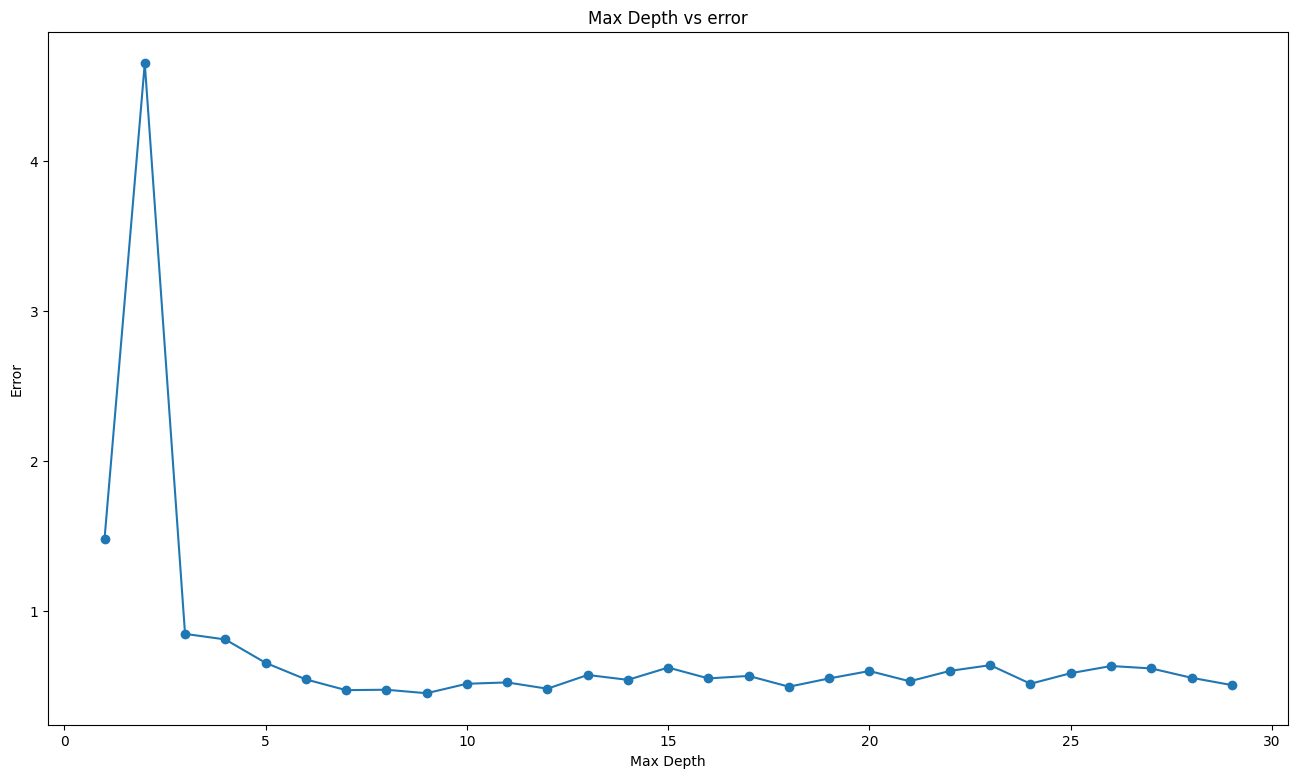

In [26]:
# plotting max depth error
plt.figure(figsize=(16,9))
plt.plot(md_error_df['max depth'], md_error_df['error'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Max Depth vs error')
plt.show()

In [27]:
fig = px.line(md_error_df, x='max depth', y='error')
fig.show()

In [28]:
# max depth = 9 gives least error
model = DecisionTreeRegressor(max_depth=9, max_features=19, random_state=42)
model.fit(X_train_final, y_train)
model.score(X_test_final, y_test)

0.6387261038459927

In [29]:
# max features
def max_feature_error(mf):
    model = DecisionTreeRegressor(max_depth=9, max_features=mf, random_state=42)
    model.fit(X_train_final, y_train)
    error = 1 - model.score(X_test_final, y_test)
    return {'max features': mf, 'error': error}

mf_error_df = pd.DataFrame([max_feature_error(mf) for mf in range(1,36)])

In [30]:
mf_error_df.head()

,max features,error
0,1,10.373560
1,2,4.664184
2,3,0.704094
3,4,0.619226
4,5,0.591673


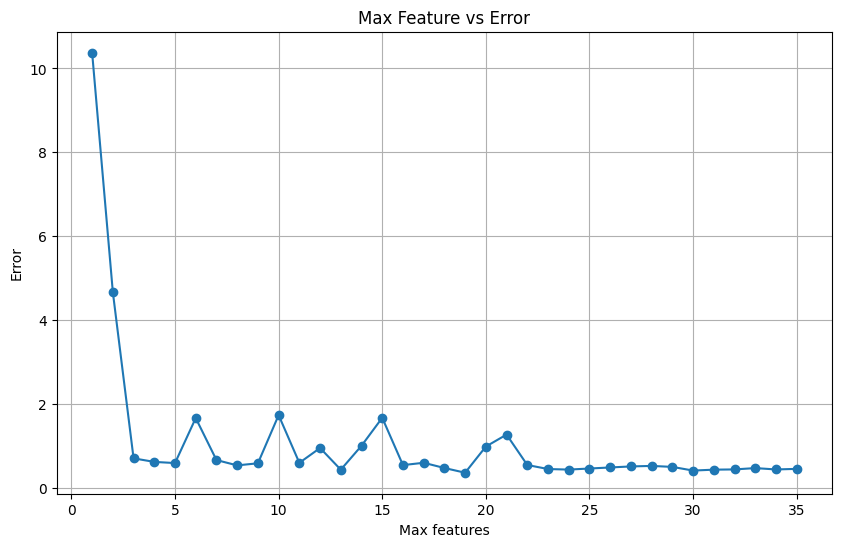

In [31]:
# plotting 
plt.figure(figsize=(10,6))
plt.plot(mf_error_df['max features'], mf_error_df['error'], marker='o')
plt.xlabel('Max features')
plt.ylabel('Error')
plt.title('Max Feature vs Error')
plt.grid()
plt.show()

In [32]:
fig = px.line(mf_error_df, x='max features', y='error')
fig.show()

In [33]:
# another model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=9, max_features=19, n_estimators=500, random_state=42)
model.fit(X_train_final, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,19
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
model.score(X_test_final, y_test)

-0.8398242398933666

In [35]:
# not helping
# trying Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1500, learning_rate = 0.05, max_depth = 6)
model.fit(X_train_final, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
model.score(X_test_final, y_test)

0.7722498178482056

In [37]:
def md_error_xg(md):
    model = XGBRegressor(max_depth = md)
    model.fit(X_train_final, y_train)
    error = 1 - model.score(X_test_final, y_test)
    return {'max depth': md,  'error': error}

xg_md_error_df = pd.DataFrame([md_error_xg(md) for md in range(1,20)])

In [38]:
xg_md_error_df.head()

,max depth,error
0,1,1.367011
1,2,7.112245
2,3,3.314228
3,4,0.351147
4,5,0.305002


In [39]:
# plotting 
fig = px.line(xg_md_error_df, x='max depth', y='error', markers='o')
fig.show()

In [40]:
# min child weight error
def min_child_wt_error(mc):
    model = XGBRegressor(min_child_weight = mc)
    model.fit(X_train_final, y_train)
    error = 1 - model.score(X_test_final, y_test)
    return {'min child weight': mc, 'error': error}

mc_error_df = pd.DataFrame([min_child_wt_error(mc) for mc in range(1,11)])
mc_error_df.head()

,min child weight,error
0,1,0.264394
1,2,2.128746
2,3,9.105551
3,4,12.978545
4,5,11.827215


In [41]:
fig = px.line(mc_error_df, x='min child weight', y='error', markers='o')
fig.show()

In [51]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1500, 
                    learning_rate = 0.05, 
                    max_depth = 6, 
                    colsample_bytree = 1,
                    )
model.fit(X_train_final, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [52]:
model.score(X_test_final, y_test)

0.7722498178482056

In [55]:
model.feature_importances_

array([5.43705595e-04, 5.10418296e-01, 1.87412265e-03, 1.27711892e-01,
       1.82019116e-03, 1.15763307e-01, 1.12657384e-04, 1.06495270e-03,
       2.13494658e-01, 1.19035998e-04, 7.58492213e-04, 6.33735181e-05,
       2.60840636e-04, 1.13789632e-04, 2.65972631e-04, 2.72595207e-03,
       4.99109318e-03, 7.67368707e-04, 0.00000000e+00, 2.24624091e-05,
       2.17761309e-03, 2.64926231e-04, 2.08122970e-06, 4.60242358e-04,
       6.76730007e-04, 1.03203382e-03, 2.16498645e-03, 1.76547299e-04,
       5.35049429e-03, 1.73930021e-04, 4.20139346e-04, 1.39174447e-03,
       5.03960764e-04, 2.31246883e-03, 0.00000000e+00], dtype=float32)

In [56]:
y_pred = model.predict(X_test_final)
y_pred

array([26480.627, 10124.325,  5645.865, ..., 42161.113,  3418.242,
       19201.86 ], shape=(1924,), dtype=float32)

In [57]:
import numpy as np

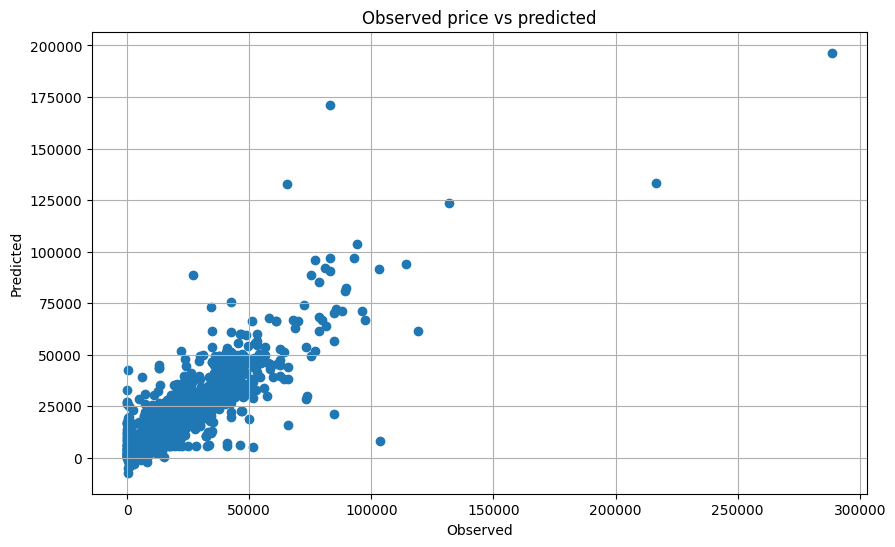

In [58]:
# plotting the predicted vs observed value
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, marker='o')
plt.title("Observed price vs predicted")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.grid()
plt.show()

In [59]:
numerical_cols, cat_cols

(['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags'],
 ['Category',
  'Leather interior',
  'Fuel type',
  'Gear box type',
  'Drive wheels',
  'Turbo'])

In [62]:
# defining a function that will preprocess an input and make it ready for prediction 
def data_prep(**kwargs):
    data_dict = {
        'Levy': kwargs.get('levy'),
        'Prod. year': kwargs.get('year'),
        'Engine volume': kwargs.get('ev'),
        'Mileage': kwargs.get('mileage'),
        'Airbags': kwargs.get('airbags'),
        'Category': kwargs.get('cat'),
        'Leather interior': kwargs.get('li'),
        'Fuel type': kwargs.get('fuel'),
        'Gear box type': kwargs.get('gear'),
        'Drive wheels': kwargs.get('wheel'),
        'Turbo': kwargs.get('turbo')
    }

    raw_df = pd.DataFrame(data=data_dict)

    numerical_cols = raw_df[input_cols].select_dtypes(include=['int', 'float']).columns.to_list()
    cat_cols = raw_df[input_cols].select_dtypes(include='object').columns.to_list()

    from sklearn.preprocessing import OneHotEncoder

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[cat_cols])

    encoded_cols = list(encoder.get_feature_names_out(cat_cols))

    raw_df[encoded_cols] = encoder.transform(raw_df[cat_cols])
    
    df_final = raw_df[numerical_cols + encoded_cols]

    return df_final    

In [66]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [67]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']